# Newtonův fraktál

## Import knihoven

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt

## Newtonova-Raphsonova metoda

In [2]:
def fce(x):
    return np.power(x,3) - np.ones_like(x, dtype=np.uint8)

def fcediff(x):
    return 3.0*np.power(x,2)
    

def Newton_Raphson(f,fdiff,p_in, MAX_ITER, a, b):
    n = 0
    x_n = p_in
    # Precission limit
    h = 0.001
    
    while ( n < MAX_ITER and f(x_n) > h):
        x_n = x_n - f(x_n)/fdiff(x_n)
        n += 1
    return x_n,n

odhad, iterace = Newton_Raphson(fce,fcediff,1.5,100,0,2)
print("Odhad kořene je:",odhad," po ",iterace,' iteracích')


Odhad kořene je: 1.00032667927  po  3  iteracích


## Fraktál

In [3]:
def newton_fractal(rlim, ilim, n=100, d=1000):
    r, i = np.meshgrid(np.linspace(rlim[0], rlim[1], d), np.linspace(ilim[0], ilim[1], d))
    
    c = r + i*1j
    z = np.copy(c)
    fractal = np.ones_like(z, dtype=np.uint8) * 255
    for j in range(n):
        mask = abs(z) <= 20
        P = fce(z[mask])
        DP = fcediff(z[mask])
        z[mask] -= P/DP
        fractal[(fractal == 255) & ~mask] = 254 * j/n
    #print(fractal[500])
    return fractal


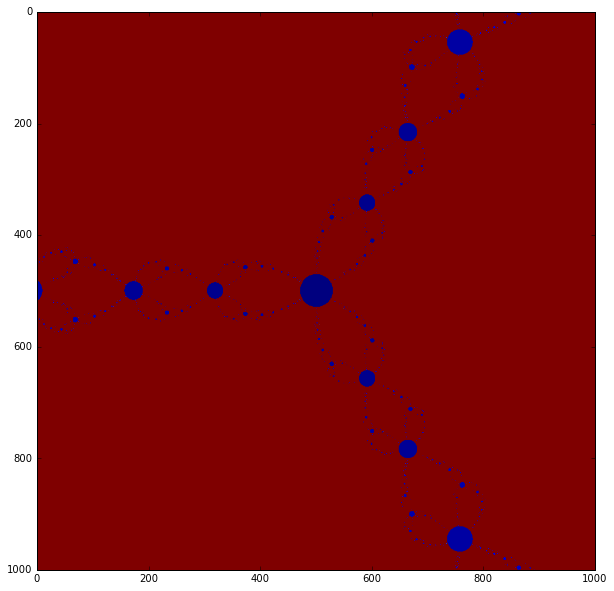

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(newton_fractal((-2.2, 2.2), (-2.2, 2.2)));
